# Link Tableu

Link :
1. https://public.tableau.com/app/profile/firman.syah1731/viz/Milestone1b_17224997174480/IndianAgriculturalProduction?publish=yes
2. https://public.tableau.com/app/profile/firman.syah1731/viz/Milestone1b_17224997174480/StatisticalTestResults?publish=yes

# PERKENALAN

Milestone 1
- Nama      : Firman Syah
- Batch     : BSD-007
- Objective : Project ini bertujuan untuk melakukan analisis potensi bisnis impor bahan pangan perkebunan dari India. Dengan melihat karakterisitik wilayah dan jenis komoditas yang dihasilkan, analisis ini juga dapat menjadi dasar untuk mendapatkan isight potensi bisnis baru di sektor hulu dari komoditas tersebut.

# IDENTIFIKASI MASALAH

Pada bagian ini akan menganalisa problem statemnet dengan menggunakan SMART framework.

| SMART | Keterangan   |
|-------|--------------|
| Specific   | Meningkatkan yield tanaman padi dan bawang di wilayah tertentu di India berdasarkan analisis data curah hujan dan luas area.|
| Measurable | Meningkatkan yield tanaman padi dan bawang sebesar 15% dibandingkan tahun sebelumnya|
| Achievable | Dengan menggunakan data curah hujan dan luas area untuk mengoptimalkan jadwal tanam dan teknik irigasi, peningkatan yield sebesar 15% adalah realistis|
| Relevant   | Peningkatan yield tanaman padi relevan untuk memenuhi kebutuhan pangan lokal dan meningkatkan pendapatan petani|
| Time-bound | Meningkatkan yield dalam waktu satu tahun tanam|


"Meningkatkan yield 15% tanaman padi dan bawang di India sangat mungkin dilakukan dalam 1 tahun kedepan dengan meningkatkan luas area tanam di wilayah yang curah hujan yang sesuai kebutuhan tanam"


Sealin itu, berikut beberapa pertanyaan yang harus dijawab dalam pengerjaan project ini:
1. Komoditas pertanian apa yang mempunyai rata-rata produksi paling tinggi ?
2. Dimana negara bagian yang mempunyai produktivitas dan yield tertinggi pada komoditas tersebut?
3. Kapan waktu terbaik mendapatkan komoditas tersebut?
4. Negara bagian mana saja yang memproduksi beras?
5. Apakah musim mempunyai hubungan dengan banyaknya jenis komoditas yang bisa diproduksi?
6. Berapa potensi produksi bawang pada tahun berikutnya di India? dengan asumsi tidak ada kenaikan produksi.

# IMPORT LIBRARY

In [3]:
# Import Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats as stats

# DATA LOADING

## Contoh query jika menagbil data dari sql
``` SQL
-- This is the query examples if you want to load it from SQL for df
SELECT * FROM corp_yield;
```

## Query dari file CSV

In [41]:
# Data yang akan dimuat adalah data dari situs Kaggel (https://www.kaggle.com/datasets/saincoder404/crop-yield-data-india)
# Upload data ke google colab
from google.colab import files
uploaded = files.upload()

Saving crop_yield.csv to crop_yield.csv


File csv berhasil diupload pada notebook

In [42]:
# Membaca file CSV dan mendefiniskan sebagai df
# Menggunakan io.BytesIO untuk membaca data dari objek io.BytesIO
df = pd.read_csv(io.BytesIO(uploaded['crop_yield.csv']))
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


File berhasil dijadikan dataframe dengan nama variabel 'df'

In [43]:
# Menampilkan unique value pada setiap kolom object
# Memeriksa nilai unik dalam setiap kolom object dengan function loop
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print()

Unique values in column 'Crop':
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']

Unique values in column 'Season':
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']

Unique values in column 'State':
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' '

Pada output ini kita bisa melihat isi dari kolom-kolom dengan type data object untuk menentukan variabel apa saja yang akan diambil. Selain itu ada whitespace pada nilai di kolom Season

In [44]:
# Menampilkan banyaknya unique value pada kolo object
# Memeriksa banyaknya nilai unik dalam setiap kolom object dengan function loop
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{column}' has {num_unique_values} unique values.")

Column 'Crop' has 55 unique values.
Column 'Season' has 6 unique values.
Column 'State' has 30 unique values.


Banyaknya jenis value yang ada membuat analisis menjadi kurang fokus, sehingga nantinya hanya data komoditas tertentu saja yang akan diambil.

In [45]:
# Menampilakan info dataframe awal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


Dari output, penamaan kolom dan tipe data setiap kolom sudah sesuai dengan standar sehingga tidak akan dilakukan perubahan tipe data pada analissi ini. pada tahapan ini diketahui bahwa terdapat 10 kolom dengan baris data sebanyak 19.689.

Dari pertimbangan yang ada, dataframe dalam analisi ini hanya akan memuat:
- 4 komoditas utama yaitu : 'Rice', 'Onion','Maize' dan 'Wheat'.
- Data yang akan diambil adalah 20 tahun terkahir dari tahun 2001-2020.
- Kolom yang akan dihapus dalam dataframe yang siap diolah adalah kolom 'Fertilizer' dan 'Pesticide' karena dalam hal ini penggunaan pupuk dan pestisida adalah faktor yang diabaikan dalam analisis ini.

# DATA CLEANING

In [46]:
# Menghilangkan kolom "Fertilizer" dan "Peptiside"
df = df.drop(['Fertilizer', 'Pesticide'], axis=1)

In [39]:
# Pengecekan
df.head()

,Crop,Year,Season,State,Area,Production,Rainfall,Yield,season_code,crop_code
780,Maize,2001,Kharif,Andhra Pradesh,337533.0,986011,928.4,2.801818,1,0
781,Maize,2001,Rabi,Andhra Pradesh,90752.0,470744,928.4,5.592857,2,0
786,Onion,2001,Kharif,Andhra Pradesh,17736.0,234978,928.4,12.744118,1,1
787,Onion,2001,Rabi,Andhra Pradesh,14089.0,324477,928.4,21.081364,2,1
794,Rice,2001,Kharif,Andhra Pradesh,2426073.0,6500545,928.4,2.627273,1,2


Kolom sudah terhapus, kini variabel 'df' hanya memiliki 8 kolom saja.

In [47]:
# Memilih tahun hanya tahun 2001 -2020 saja

df = df[~(df['Crop_Year']<=2000)]
# Pengecekan
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield
757,Arecanut,2001,Whole Year,Andhra Pradesh,268.0,449,928.4,1.710000
758,Arhar/Tur,2001,Kharif,Andhra Pradesh,414401.0,185620,928.4,0.465000
759,Arhar/Tur,2001,Rabi,Andhra Pradesh,5439.0,2706,928.4,0.460000
760,Bajra,2001,Kharif,Andhra Pradesh,81851.0,63589,928.4,0.851765
761,Bajra,2001,Rabi,Andhra Pradesh,9684.0,7442,928.4,0.795000


Dari tahapan ini terlihat bahwa tahun terkecl adalah 2001. menandakan bahwa drop row berhasil

In [48]:
# Mengambil value pada kolo crop atau nama komoditas yang dimasukan dalam project ini
df = df[df['Crop'].isin(['Rice', 'Onion', 'Maize', 'Wheat'])]
# Pengecekan
df['Crop'].unique()

array(['Maize', 'Onion', 'Rice', 'Wheat'], dtype=object)

Saat ini dataframe hanya memiliki 4 nilai pada kolom Crop.


In [49]:
# Pengecekan Keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2751 entries, 780 to 19680
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             2751 non-null   object 
 1   Crop_Year        2751 non-null   int64  
 2   Season           2751 non-null   object 
 3   State            2751 non-null   object 
 4   Area             2751 non-null   float64
 5   Production       2751 non-null   int64  
 6   Annual_Rainfall  2751 non-null   float64
 7   Yield            2751 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 193.4+ KB


Dari hasil cleansing diperoleh datafram yang akan diolah sebanyak 8 kolom dan 2751 baeris data.

In [50]:
# merubah nama kolom dalam 1 kata saja agar mempermudah penulisan syntax
df.columns = df.columns.str.replace('Crop_Year', 'Year')
df.columns = df.columns.str.replace('Annual_Rainfall', 'Rainfall')

# Pengacekan hasilnya
df.columns

Index(['Crop', 'Year', 'Season', 'State', 'Area', 'Production', 'Rainfall',
       'Yield'],
      dtype='object')

Nama kolom berhasil diubah.

In [51]:
# Menemukan baris duplikat
duplikat = df[df.duplicated()]
print(duplikat)

Empty DataFrame
Columns: [Crop, Year, Season, State, Area, Production, Rainfall, Yield]
Index: []


Tidak ada baris yang duplikat

In [53]:
# Mengecek jumlah missing value di setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

Crop          0
Year          0
Season        0
State         0
Area          0
Production    0
Rainfall      0
Yield         0
dtype: int64


Tidak ada missing value pada df yang dibuat dalam analisi ini

In [72]:
# Menghapus white space pada kolom Season
df['Season'] = df['Season'].str.strip()
# Pengecekan
df['Season'].unique()

array(['Kharif', 'Rabi', 'Whole Year', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

white space berhasil dihilangkan.

In [73]:
# Menyimpan dataframe dalam csv baru
df.to_csv('data_milestone.csv', index=False)

File dengan nama 'datamilestone.csv' berhasil disimpan, data ini nantinya akan digunakan untuk membuat visualisasi pada Tableu.

# ANALISIS DAN PERHITUNGAN

## Melakukan Pengamatan Keunikan Dataset

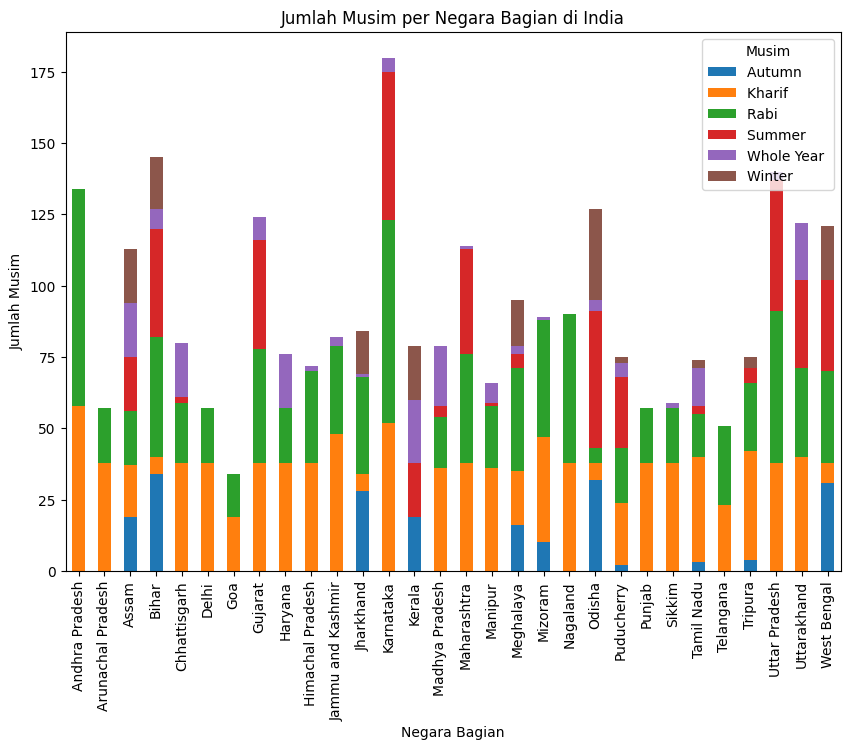

In [55]:
# Pengecekan jumlah musim tiap negara
# Groupby dan value_counts
musim_negara = df.groupby('State')['Season'].value_counts().unstack(fill_value=0)

# Membuat bar plot
musim_negara.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Jumlah Musim per Negara Bagian di India')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Musim')
plt.legend(title='Musim')
plt.show()

Pada hasil data explorasi ini, terlihat bahwa India mempunyai luas geografis yang sangan besar. Setiap negara bagian mempunyai jumlah musim yang berbeda-beda. Hal inilah yang menjadikan data ini unik untuk dikaji lebih lanjut, mengingat tidak semua jenis tanaman dapat tumbuh di semua musim atau iklim tertentu.

Text(0.5, 1.0, 'Yield tiap komoditas berdasarkan Negara Bagian')

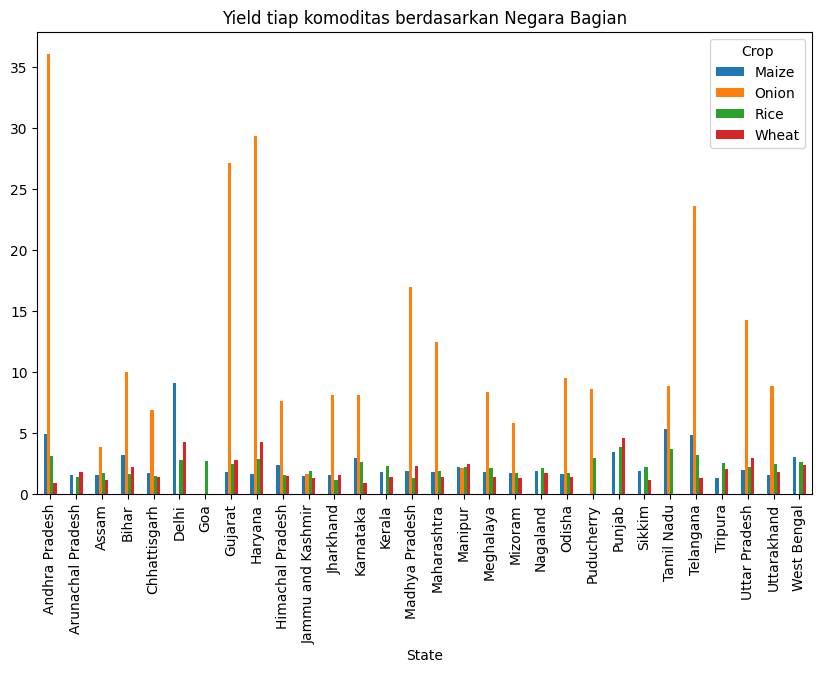

In [57]:
# Menampilkan produksi tiap komoditas pada setiap negara bagian
produksi_per_state = df.groupby(['State', 'Crop'])['Yield'].mean().unstack()

# Membuat bar plot
produksi_per_state.plot(kind='bar', figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Yield tiap komoditas berdasarkan Negara Bagian')

Dapat dilihat bahwa dari 4 warna batang yang tersedia, tidak semua negara bagian mempunyai warna yang disediakan. Ini menandakan bahwa tidak semua negara memproduksi 4 komoditas yang ditentukan. sebagai contoh, negara bagian Punduchery hanya memproduksi Padi dan Bawang saja.

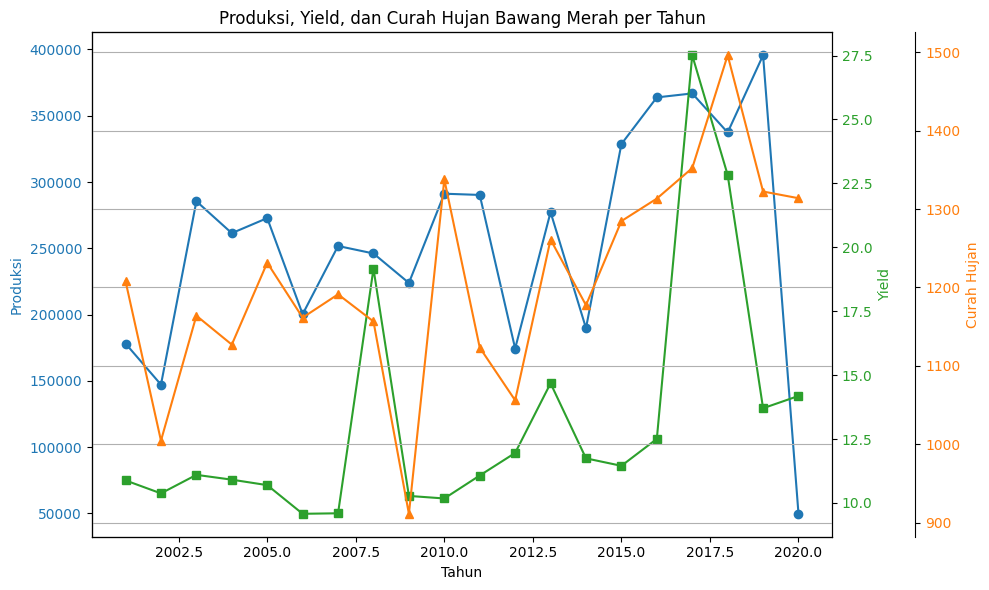

In [59]:
# Mengelompokkan data dan menghitung total produksi dan yield per tahun
# Filter data untuk bawang merah
onion_data = df[df['Crop'] == 'Onion']

# Mengelompokkan data dan menghitung total produksi, rata-rata yield, dan rata-rata curah hujan per tahun
produksi_onion = onion_data.groupby('Year')['Production'].mean()
yield_onion = onion_data.groupby('Year')['Yield'].mean()
rainfall_onion = onion_data.groupby('Year')['Rainfall'].mean()

# Membuat line chart untuk produksi, yield, dan curah hujan
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot produksi
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Produksi', color='tab:blue')
ax1.plot(produksi_onion.index, produksi_onion.values, label='Produksi', color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Membuat axis kedua untuk yield
ax2 = ax1.twinx()
ax2.set_ylabel('Yield', color='tab:green')
ax2.plot(yield_onion.index, yield_onion.values, label='Yield', color='tab:green', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Membuat axis ketiga untuk curah hujan
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Curah Hujan', color='tab:orange')
ax3.plot(rainfall_onion.index, rainfall_onion.values, label='Curah Hujan', color='tab:orange', marker='^')
ax3.tick_params(axis='y', labelcolor='tab:orange')

# Menambahkan judul dan grid
plt.title('Produksi, Yield, dan Curah Hujan Bawang Merah per Tahun')
fig.tight_layout()
plt.grid(True)

# Menampilkan
plt.show()

Melihat laju diagram garis tentang rata-rata curah hujan, jumlah produksi dan yield secara sekilas terlihat mempunya pola yang mirip. Namun jika dilihat dengan teliti, pergerakannya tidak selalu sama. Sebagai contoh, pada tahun terakhir saat rata-rata curah hujan dan produktifitas menurun, rata-rata yield jutru meningkat meski tidak terlalu signifikan.

## Porduction VS Productivity
Bagian ini akan menampilkan komoditas apa yang mempunyai rata-rata produksi terbanyak di India dengan menggunakan nilai "Production". Selain itu untuk analisis lebih lanjut, daftar komoditas tersebut kita hitung produktifitasnya dengan menggunakan nilai "Yield" yang didapat dari (Luas Area / Jumlah Produksi).



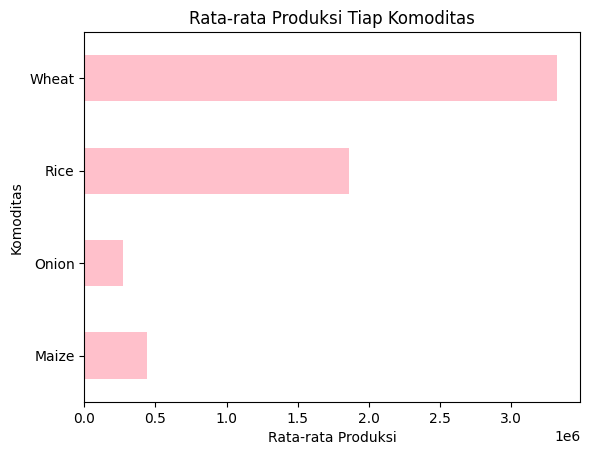

In [60]:
# Mencari komoditas pertanian apa yang mempunyai rata-rata produksi paling tinggi ?
average_production = df.groupby('Crop')['Production'].mean()
# Menampilkan hasil
average_production
# Menampilkan hasil dalam diagram batang
average_production.plot(kind='barh', color='pink')
plt.title('Rata-rata Produksi Tiap Komoditas')
plt.xlabel('Rata-rata Produksi')
plt.ylabel('Komoditas')
plt.show()

Dari diagram yang ada, terlihat produksi gandum mempunya nilai yang besar (dalam juta ton) disusul oleh beras, bawang merah dan jagung secara berturut-turut. Namun tingginya produksi sebuah komoditas, belum tentu tinggi produktif. Jika dibutuhkan Untuk mengetahui komoditas mana yang produktif maka kita menggunakan indikator rata-rata Yiel pertahun setiap komoditas. Seperti berikt:


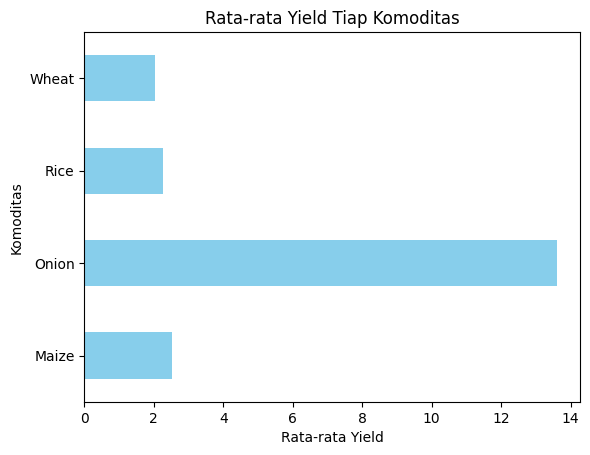

In [61]:
# Mencari komoditas pertanian apa yang mempunyai rata-rata Yield paling tinggi ?
average_production = df.groupby('Crop')['Yield'].mean()
# Menampilkan hasil
average_production
# Menampilkan hasil dalam diagram batang
average_production.plot(kind='barh', color='skyblue')
plt.title('Rata-rata Yield Tiap Komoditas')
plt.xlabel('Rata-rata Yield')
plt.ylabel('Komoditas')
plt.show()

Dalam tampilan perhitungan, terlihat bahwa Bawang Merah atau Onion adalah komoditas dengan produktifitas tertinggi dibandingkan dengan komoditas lainya.

## Best Location for Wheat Production
Bagian ini akan menampilkan negara bagian mana yang mempunyai produktifitas (Yield) gandum terbaik d India. Selain itu untuk mengkaji lebih lanjut, akan juga ditampilkan negara dengan produksi terbanyak yang nantinya dibandingkan apakan negara bagian yang mempunya produksi terbanyak juga mempunyai produktifitas yang baik?

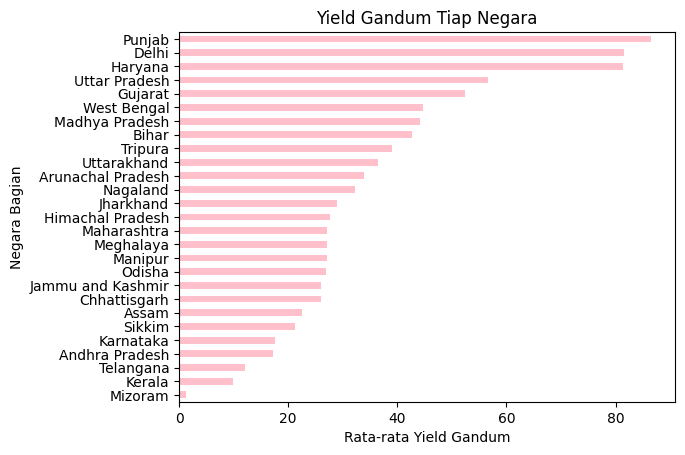

In [62]:
# Filter data untuk gandum saja
wheat_data = df[df['Crop'] == 'Wheat']

# Menghitung rata-rata produksi gandum tiap negara
average_yield = wheat_data.groupby('State')['Yield'].sum()

# Mengurutkan data berdasarkan rata-rata produksi tertinggi
average_yield = average_yield.sort_values(ascending=True)

# Menampilkan hasil dalam diagram batang
ax = average_yield.plot(kind='barh', color='pink')
plt.title('Yield Gandum Tiap Negara')
plt.xlabel('Rata-rata Yield Gandum')
plt.ylabel('Negara Bagian')


plt.show()

Dapat dilihat bahawa ada 3 negara  bagian dengan nilai Yield terbaik pada komoditas Gandum/Wheat di India yaitu Punjab, Delhi, dan Haryana secara berturut-turut. Untuk kajian lebih lanjut, apakah ketiga negara bagian tersebut juga sebagai penyumbang produksi gandum terbanyak secara nasional? jabawannya dijabarkan pada bagian selanjutnya untuk melihat proporsi setiap negara bagian dengan menhitung jumlah nilai "Production".

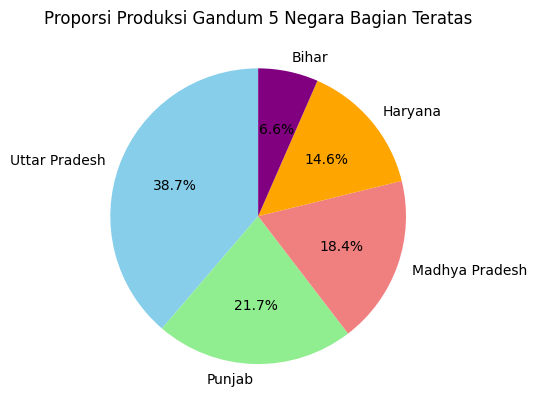

In [63]:
# Menghitung total produksi gandum tiap negara bagian
total_production = wheat_data.groupby('State')['Production'].sum()

# Memilih 10 data teratas
top_10_production = total_production.nlargest(5)

# Menampilkan hasil dalam diagram lingkaran
top_10_production.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'pink', 'yellow', 'red', 'blue', 'green'])
plt.title('Proporsi Produksi Gandum 5 Negara Bagian Teratas')
plt.ylabel('')  # Menghapus label y
plt.show()

Pada tahapan ini terlihat bahwa negara bagian penyumbang produksi gandum terbesar adalah Uttar Pradesh, Punjab dan Madhya Pradesh. Jika dibandingkan dengan diagram sebelumnya, hasil ini menunjukan bahwa tidak semua negara yg produksinya besar mempunyai tingkat produktifitas yang besar pula. Dapat dilihat bahwa hanya Punjab yang masuk dalam daftar 3 terbesar.

## Best Time for Wheat and Onion


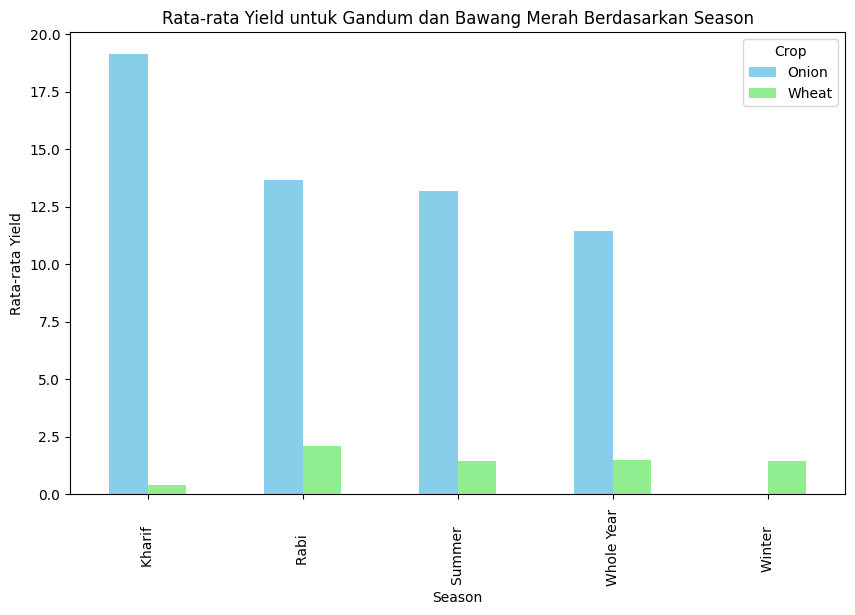

In [64]:
# Filter data untuk komoditas Wheat dan Onion saja
filtered_data = df[df['Crop'].isin(['Wheat','Onion'])]

# Menghitung rata-rata yield berdasarkan season
average_yield = filtered_data.groupby(['Season', 'Crop'])['Yield'].mean().unstack()

# Menampilkan hasil dalam diagram batang
average_yield.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Rata-rata Yield untuk Gandum dan Bawang Merah Berdasarkan Season')
plt.xlabel('Season')
plt.ylabel('Rata-rata Yield')
plt.legend(title='Crop')
plt.show()

Dari hasil diatas dapat disimpulkan bahwa hanya gandum yang bisa diproduksi pada semua musim namun hasil terbaik panen bawang ada pada musim Rabi, sedangkan hasil terburuk ada pada musim Kharif. hal yang berlawanan terjadi pada kommoditas bawang, meski cenderung stabil diberbagai musim, musim Kharif mempunyai hasil panen bawang yang terbaik. Tetapi, di musim dingin bawang tidak dapat diproduksi di India.

## Indian Rice and Its Uniqueness

<ipython-input-65-23cb68993701>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(total_production.index, rotation=90)


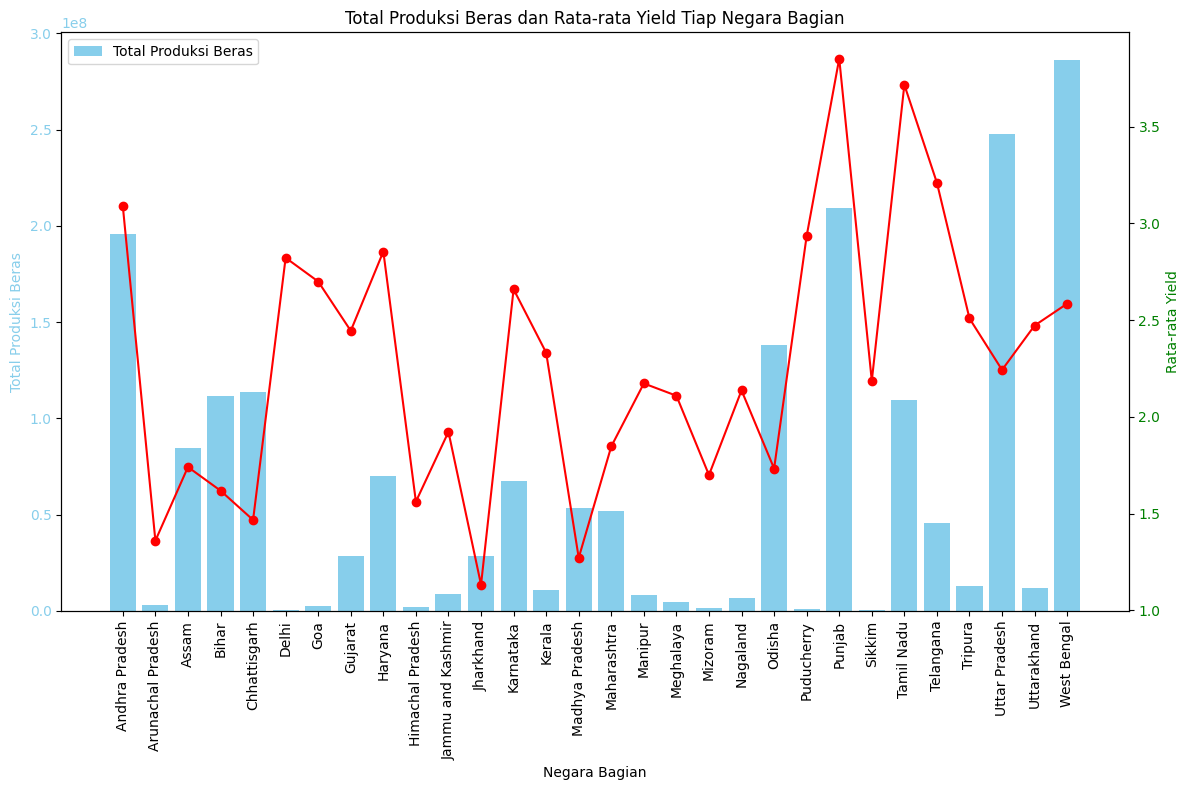

In [65]:
# Filter data untuk produksi beras saja
filtered_data = df[df['Crop'] == 'Rice']

# Menghitung total produksi beras tiap negara bagian
total_production = filtered_data.groupby('State')['Production'].sum()

# Menghitung rata-rata yield tiap negara bagian
average_yield = filtered_data.groupby('State')['Yield'].mean()

# Membuat plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot batang untuk produksi
ax1.bar(total_production.index, total_production.values, color='skyblue', label='Total Produksi Beras')
ax1.set_xlabel('Negara Bagian')
ax1.set_ylabel('Total Produksi Beras', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Menambahkan legenda
ax1.legend(loc='upper left')

# Plot garis untuk yield
ax2 = ax1.twinx()
ax2.plot(average_yield.index, average_yield.values, color='red', marker='o', label='Rata-rata Yield')
ax2.set_ylabel('Rata-rata Yield', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Merubah penamaan sumbu x menjadi vertikal
ax1.set_xticklabels(total_production.index, rotation=90)

# Menambahkan judul dan legenda
plt.title('Total Produksi Beras dan Rata-rata Yield Tiap Negara Bagian')
fig.tight_layout()
plt.show()


Dari hasil dapat disimpulkan bahwa hampir semua negara bagian di India memproduksi beras,namun volume utamanya  hanya didomminasi beberapa negara bagian saja seperti WestBengal, Uttar Pradesh, Punjab dan Andhra Pradesh. Sealin itu, produktifitas tertinggi komoditas padi hanya ada di Punjab dan Andhra Pradesh. Menilik nilai yield padi (garis merah) pada setiap negara bagian, tingkat produktifitasnya sangat beragam namun ada tren produktifitasnya tinggi namun jumlah produksinya tidak banyak. Sehingga negara-negara ini sangat potensial untuk diperluar area tanamnya.

In [66]:
df = df.replace("\s+", " ", regex=True).apply(lambda x: x.str.strip() if isinstance(x, str) else x)

## Correlation of Season & Crop

Pada bagian ini akan menghitung hubungan antara musim dan jenis komoditas yang dipanen, sehingga kita akan mendefiniskan hipotesis nya yang nantinya akan dijawab setelah perhitungan dilakukan.

- H0 = Adanya hubungan antara musim dan jenis komoditas.
- H1 = Tidak adanya hubungan antara musim dan jenis komoditas.


Selain itu, bagian ini akan menguji dengan 2 metode sebagai perbadingan:
- Chi_Squared Test
- Function .corr()

In [67]:
# Metode 1
# Membuat contigency Tabel dengan function pdcrosstab
contingency_table = pd.crosstab(df['Season'], df['Crop'])
# Pengecekan
contingency_table

Crop,Maize,Onion,Rice,Wheat
Season,,,,
Autumn,57,0,141,0
Kharif,430,64,427,5
Rabi,194,138,120,438
Summer,128,49,212,16
Whole Year,18,157,2,8
Winter,16,0,130,1


Hasil dari tahapan inij adalah menghitung jumlah pada setiap kategori komditas di setiap musim

In [68]:
# Menghitung nilai p-value dan dibandingkan dengan critical value 0,05
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


Critical value: 0.05

p-val = 0.0 < critical value

H0 rejected

Conclusion:

Tidak ada hubungan antara jenis komoditas yang dipanen terhadap jenis musim yang ada di seluruh wilayah India.

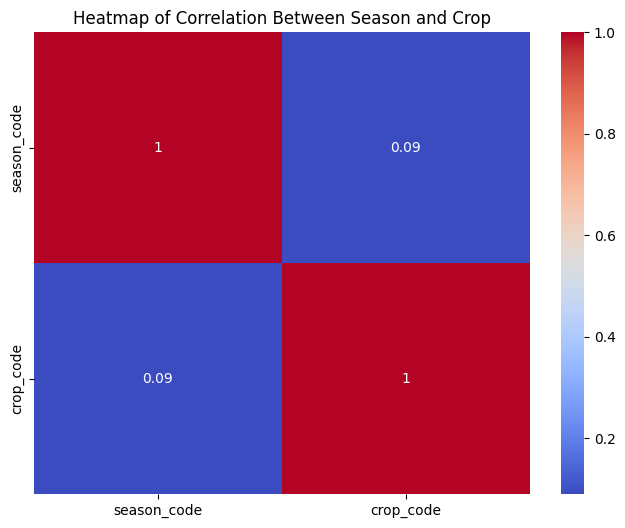

In [69]:
# Metode 2
# Mengubah data kategorikal menjadi data numerik dengan pd.Categorical
df['season_code'] = pd.Categorical(df['Season']).codes
df['crop_code'] = pd.Categorical(df['Crop']).codes

# Menghitung korelasi antara 'season_code' dan 'crop_code'
correlation_matrix = df[['season_code', 'crop_code']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Season and Crop')
plt.show()

Dengan metode juga terlihat bahwa hubungan antara musim dan jenis komoditas sangat kecil dan mendekati nol sehingga dapat disimpulkan tidak ada hubungan.

## Onion production estimation

In [70]:
# Filter data untuk hanya kategori 'onion'
df_onion = df[df['Crop'] == 'Onion']['Production']

# Menghitung mean dan standard deviation dari data produksi bawang
mean_production = np.mean(df_onion)
std_deviation = np.std(df_onion, ddof=1)

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_level = 0.95
degrees_freedom = len(df_onion) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_production, std_deviation / np.sqrt(len(df_onion)))

print(f"Potensi produksi bawang di India dengan tingkat kepercayaan 95% adalah antara {confidence_interval[0]:.2f} dan {confidence_interval[1]:.2f} ton.")

Potensi produksi bawang di India dengan tingkat kepercayaan 95% adalah antara 222233.64 dan 327133.06 ton.


# KESIMPULAN

Dari hasil analisis data yang dilakukan, dapat disimpulkan bahwa:
- dari 4 komoditas pertanian di India, yang mempunyain produksi paling banyak dalam kurun waktu 20 tahun terakhir adalah gandum
- bawang merah adalah komoditas dengan yield paling tinggi dan stabil selama periode pengamatan.
- komoditas beras diproduksi hampir disemua wilayah di India, sehingga tidak asing jika india menyumbang 20% dari total produksi beras dunia. Namun, tingginya produksi tidak diimbangi dengan tingkat yieldnya pula pada beberapa daerah.
- Beberapa daerah penghasil beras yang memiliki nilai yield tinggi harus ditingkatkan jumlah produksinya dengan menambah luar area tanam, sehingga dapat menyokong nilai produksi beras secara nasional.